# SVM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()

## サポートベクターマシンの必要性

In [2]:
from sklearn.datasets.samples_generator import make_blobs

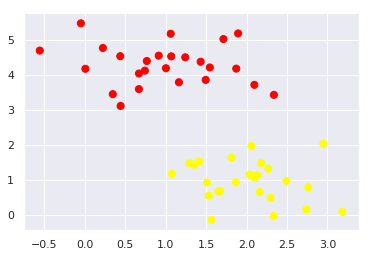

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')

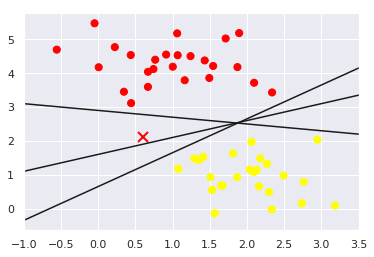

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## マージンの最大化

(-1, 3.5)

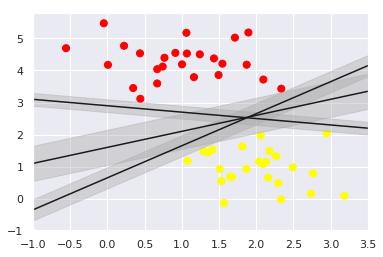

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

こんなことをしてくれる

## SVMへの適用

In [6]:
from sklearn.svm import SVC

In [13]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    '''Plot the decision function for a 2D SVC
    '''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
                        levels=[-1, 0, 1], alpha=0.5,
                        linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                            model.support_vectors_[:, 1],
                            s=300, linewidth=1, facecolors='none', edgecolors='black')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

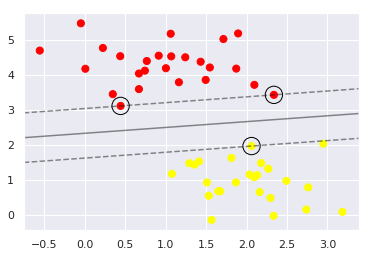

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [17]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [18]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

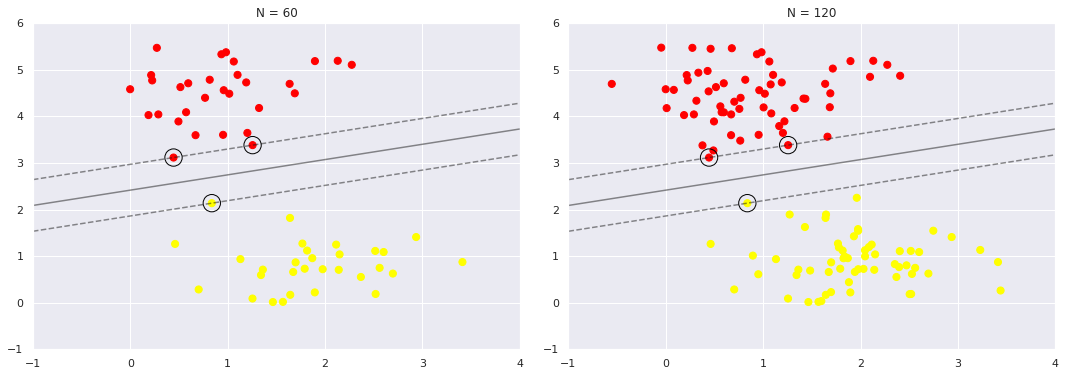

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {}'.format(N))

In [21]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100,200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100, 200), value=10), Output()), _dom_classes=('w…

## 非線形データ: カーネルSVM

In [22]:
from sklearn.datasets.samples_generator import make_circles

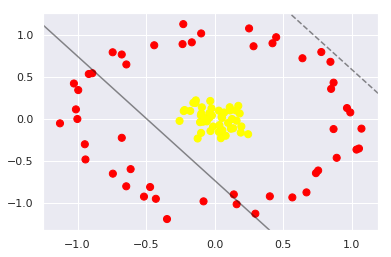

In [29]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [30]:
r = np.exp(-X **2).sum(1)

In [31]:
from mpl_toolkits import mplot3d

In [34]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [35]:
interact(plot_3D, elev=[30, 60], azip=(-180, 180),
                X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(30, 60), value=30), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.38750683e-01, -6.44053626e-01],
       [ 9.89457207e-01,  7.73695092e-02],
       [ 1.59771007e-01, -2.09462948e-02],
       [ 5.66559273e-01, -9.32410111e-01],
       [-9.38390790e-02,  1.37916893e-01],
       [-1.01144065e-01,  4.30526849e-02],
       [-5.16116703e-01, -9.22903480e-01],
       [ 7.54960852e-01, -6.12699843e-01],
       [-2.25976859e-01,  9.34244956e-02],
       [-9.18886867e-01,  5.33752363e-01],
       [ 5.56102837e-02, -1.33361222e-01],
       [ 8.67520188e-01,  4.30749118e-01],
       [-2.56536853e-01, -2.37038370e-02],
       [ 1.12589271e-01,  1.00671644e-01],
       [-1.67129488e-01,  9.10049235e-01],
       [-3.08357910e-02, -1.43697330e-01],
       [-1.02750316e+00,  4.20908048e-01],
       [-6.11417476e-02,  2.60670448e-03],
       [ 9.77815524e-02, -4.70943397e-02],
       [ 1.18496299e-01, -1.16579148e-01],
       [-1.78720537e-01,  9.50507288e-02],
       [-7.44667911e-01,  7.91854667e-01],
       

In [42]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

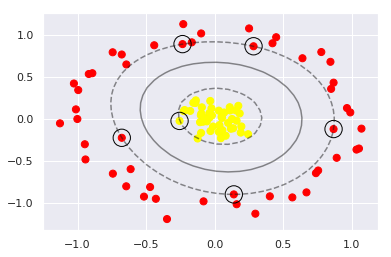

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

## SVMのチューニング:　ソフトマージン

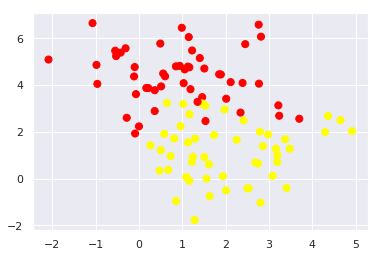

In [46]:
X, y = make_blobs(n_samples=100, centers=2,
                                 random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

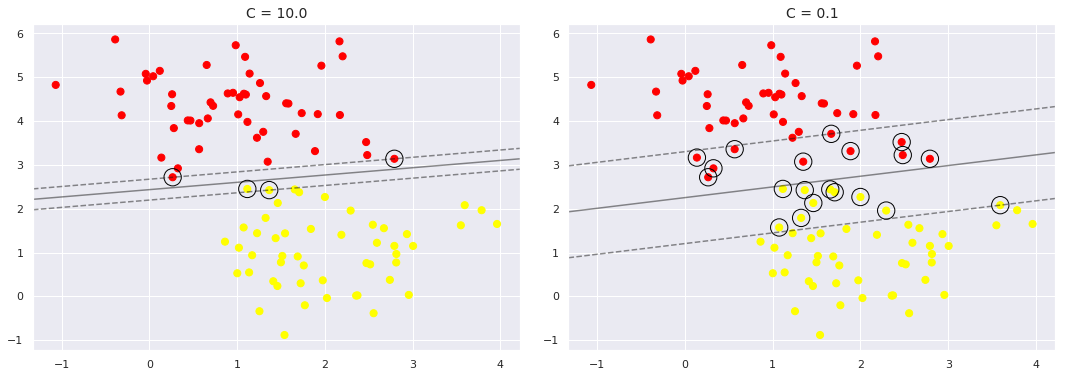

In [48]:
X, y = make_blobs(n_samples=100, centers=2,
                                 random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                        s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## 顔認識

In [79]:
from sklearn.datasets import fetch_lfw_people

In [80]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


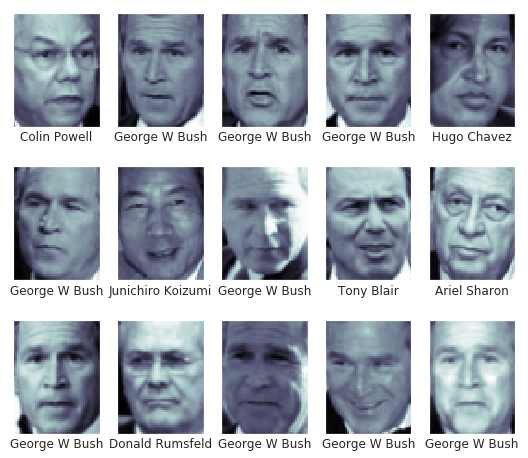

In [81]:
fig, ax = plt.subplots(3, 5, figsize=(9, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [82]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [83]:
pca = PCA(n_components=150, whiten=True, random_state=42,
                    svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=3)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 16s, sys: 12.8 s, total: 1min 29s
Wall time: 20.3 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [88]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

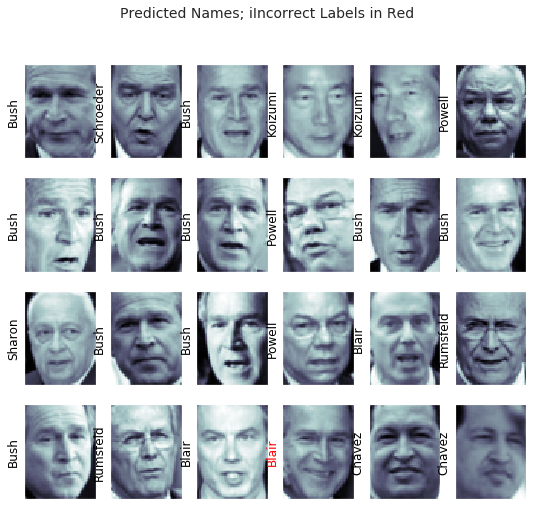

In [89]:
fig, ax = plt.subplots(4, 6, figsize=(9, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                              color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; iIncorrect Labels in Red', size=14)

In [115]:
from sklearn.metrics import classification_report

In [123]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [124]:
from sklearn.metrics import confusion_matrix

Text(54.26, 0.5, 'predicted label')

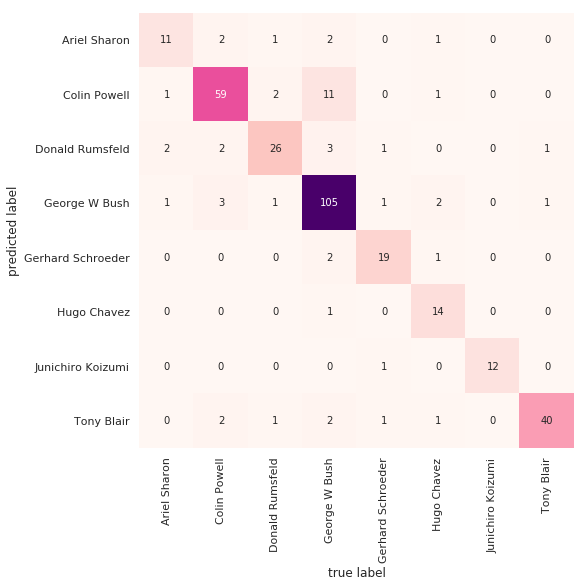

In [126]:
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(8, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                       cbar=False, cmap='RdPu',
                       xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')